In [2]:
!pip install seaborn

     |████████████████████████████████| 285 kB 1.4 MB/s eta 0:00:01


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# MLM vs GLM

In [36]:
def draw_pretrain_diff(df):
    g = sns.catplot(
        data=df, kind="bar",
        x="lan", y="score", hue="procedure",
        ci="sd", palette="dark", alpha=.6, height=6,
        hue_order=['MLM', 'GLM']
    )
    g.set(ylim=(60, None))
    g.despine(left=True)
    g.set_axis_labels("language", "Test score")
    g.legend.set_title("")

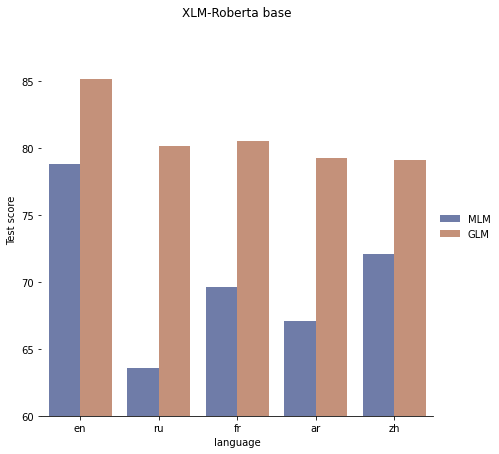

In [37]:
xlmr_base_df = pd.DataFrame([
    ['GLM', 'en', 85.1],
    ['GLM', 'ru', 80.1],
    ['GLM', 'fr', 80.5],
    ['GLM', 'ar', 79.2],
    ['GLM', 'zh', 79.1],
    
    ['MLM', 'en', 78.8],
    ['MLM', 'ru', 63.6],
    ['MLM', 'fr', 69.6],
    ['MLM', 'ar', 67.1],
    ['MLM', 'zh', 72.1],
], columns=['procedure', 'lan', 'score'])

draw_pretrain_diff(xlmr_base_df)
plt.title('XLM-Roberta base');

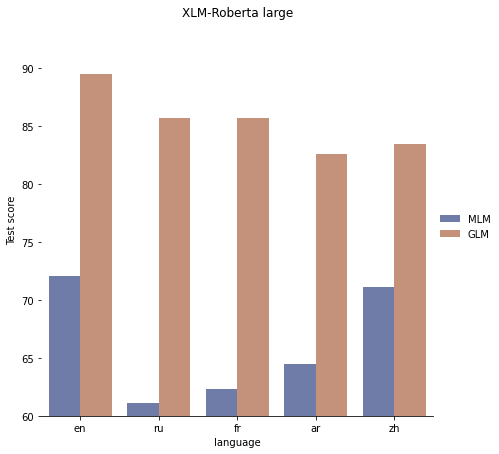

In [20]:
xlmr_large_df = pd.DataFrame([
    ['GLM', 'en', 89.5],
    ['GLM', 'ru', 85.7],
    ['GLM', 'fr', 85.7],
    ['GLM', 'ar', 82.6],
    ['GLM', 'zh', 83.5],
    
    ['MLM', 'en', 72.1],
    ['MLM', 'ru', 61.1],
    ['MLM', 'fr', 62.3],
    ['MLM', 'ar', 64.5],
    ['MLM', 'zh', 71.1],
], columns=['procedure', 'lan', 'score'])

draw_pretrain_diff(xlmr_large_df)
plt.title('XLM-Roberta large');

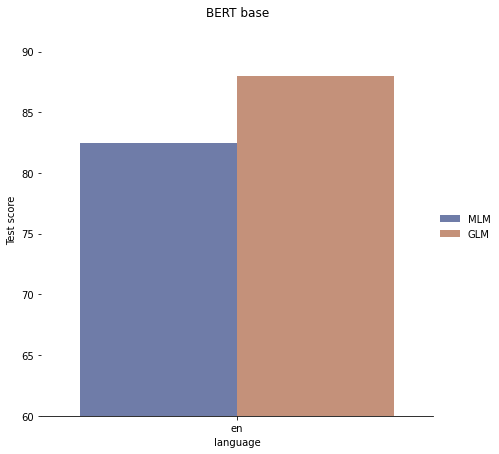

In [21]:
bert_base_df = pd.DataFrame([
    ['GLM', 'en', 88],
    ['MLM', 'en', 82.5],
], columns=['procedure', 'lan', 'score'])

draw_pretrain_diff(bert_base_df)
plt.title('BERT base');

In [225]:
def set_up_fonts():
    sns.set_context("paper", rc={
        "font.size": 15,"axes.titlesize": 15,"axes.labelsize": 17, "legend.fontsize": 17,
        "xtick.labelsize": 14, "ytick.labelsize": 14
    })

In [226]:
def draw_pretrain_diff_models(models_df):
    set_up_fonts()
    
    g = sns.catplot(
            data=models_df, kind="bar",
            x="lan", y="score", hue="procedure", col="model",
            ci="sd", palette="dark", alpha=.6, height=6,
            hue_order=['MLM', 'GLM'],
            aspect=5/6, 
            #sharex=False
        )
    
    g.set(ylim=(60, None))
    g.despine(left=True)
    g.set_axis_labels("Language", "Test score")
    g.legend.set_title("")

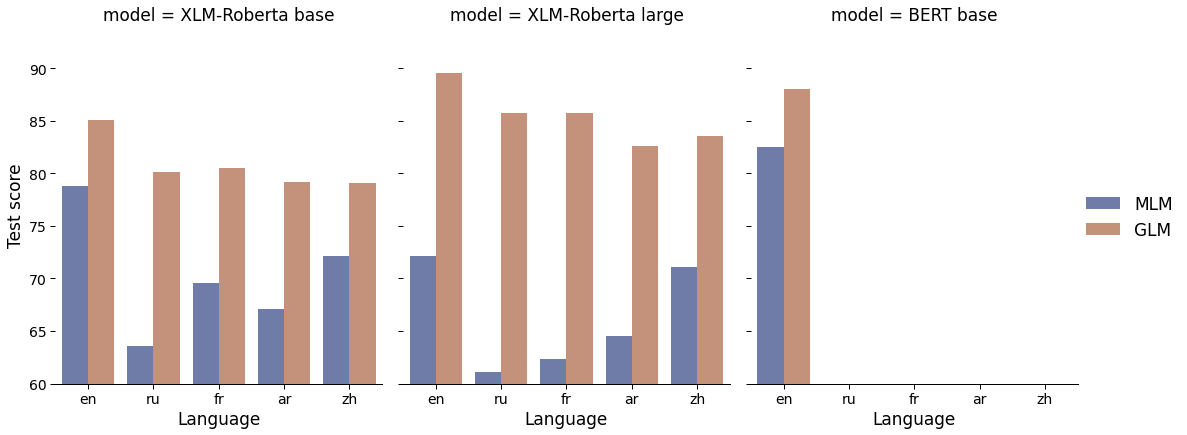

In [227]:
xlmr_base_df['model'] = 'XLM-Roberta base'
xlmr_large_df['model'] = 'XLM-Roberta large'
bert_base_df['model'] = 'BERT base'

models_df = pd.concat([xlmr_base_df, xlmr_large_df, bert_base_df])
draw_pretrain_diff_models(models_df)

# Dist diffs

In [228]:
def draw_method_diff(df, y_min=50):
    set_up_fonts()
    
    g = sns.catplot(
        data=df, kind="bar",
        x="model", y="score", hue="method",
        ci="sd", palette="dark", alpha=.6, height=6,
        aspect=11.7/6, 
    )
    g.set(ylim=(y_min, None))
    g.despine(left=True)
    g.set_axis_labels("Model", "Test score")
    g.legend.set_title("")

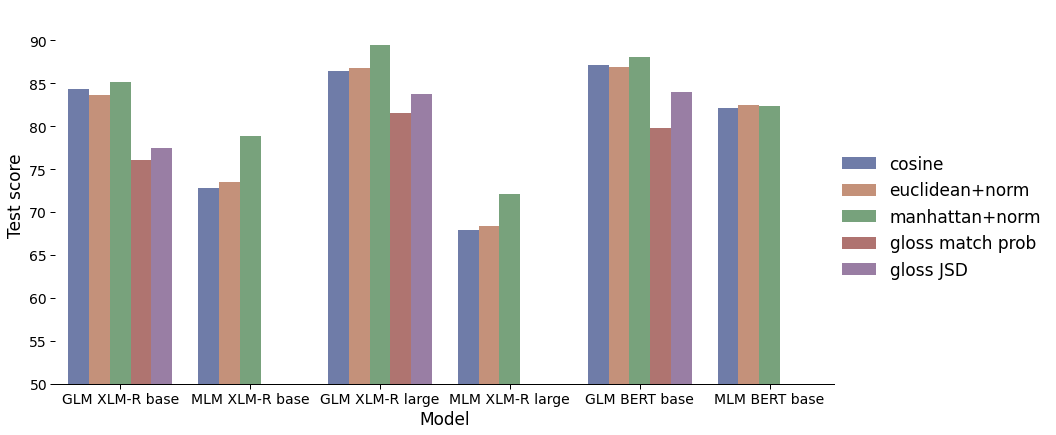

In [229]:
dist_en_df = pd.DataFrame([
    ['cosine', 'GLM XLM-R base', 84.3],
    ['euclidean+norm', 'GLM XLM-R base', 83.6],
    ['manhattan+norm', 'GLM XLM-R base', 85.1],
    ['gloss match prob', 'GLM XLM-R base', 76.1],
    ['gloss JSD', 'GLM XLM-R base', 77.5],
    
    ['cosine', 'MLM XLM-R base', 72.8],
    ['euclidean+norm', 'MLM XLM-R base', 73.5],
    ['manhattan+norm', 'MLM XLM-R base', 78.8],
    
    ['cosine', 'GLM XLM-R large', 86.4],
    ['euclidean+norm', 'GLM XLM-R large', 86.8],
    ['manhattan+norm', 'GLM XLM-R large', 89.5],
    ['gloss match prob', 'GLM XLM-R large', 81.5],
    ['gloss JSD', 'GLM XLM-R large', 83.8],
    
    ['cosine', 'MLM XLM-R large', 67.9],
    ['euclidean+norm', 'MLM XLM-R large', 68.4],
    ['manhattan+norm', 'MLM XLM-R large', 72.1],
    
    ['cosine', 'GLM BERT base', 87.1],
    ['euclidean+norm', 'GLM BERT base', 86.9],
    ['manhattan+norm', 'GLM BERT base', 88],
    ['gloss match prob', 'GLM BERT base', 79.8],
    ['gloss JSD', 'GLM BERT base', 84],
    
    ['cosine', 'MLM BERT base', 82.1],
    ['euclidean+norm', 'MLM BERT base', 82.5],
    ['manhattan+norm', 'MLM BERT base', 82.4],
    
], columns=['method', 'model', 'score'])

draw_method_diff(dist_en_df)
#plt.title('Distance methods (English)');

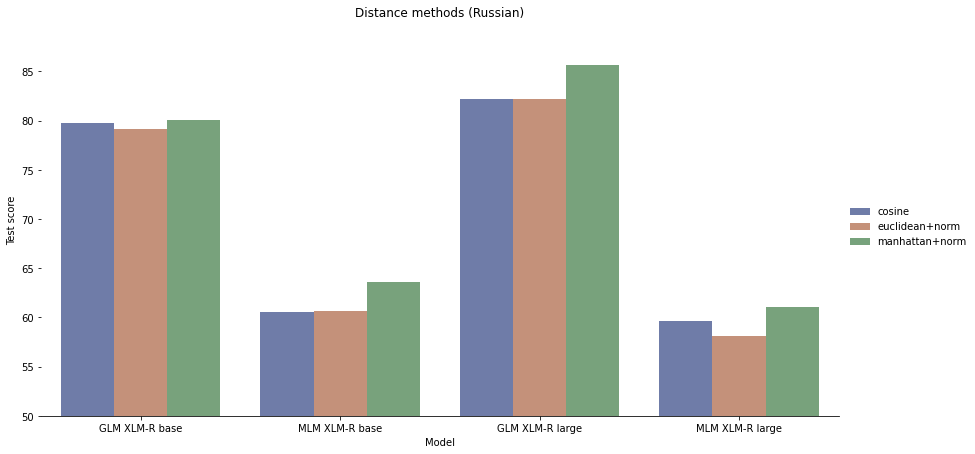

In [27]:
dist_ru_df = pd.DataFrame([
    ['cosine', 'GLM XLM-R base', 79.8],
    ['euclidean+norm', 'GLM XLM-R base', 79.2],
    ['manhattan+norm', 'GLM XLM-R base', 80.1],
    
    ['cosine', 'MLM XLM-R base', 60.5],
    ['euclidean+norm', 'MLM XLM-R base', 60.7],
    ['manhattan+norm', 'MLM XLM-R base', 63.6],
    
    ['cosine', 'GLM XLM-R large', 82.2],
    ['euclidean+norm', 'GLM XLM-R large', 82.2],
    ['manhattan+norm', 'GLM XLM-R large', 85.7],
    
    ['cosine', 'MLM XLM-R large', 59.6],
    ['euclidean+norm', 'MLM XLM-R large', 58.1],
    ['manhattan+norm', 'MLM XLM-R large', 61.1],
    
], columns=['method', 'model', 'score'])

draw_method_diff(dist_ru_df)
plt.title('Distance methods (Russian)');

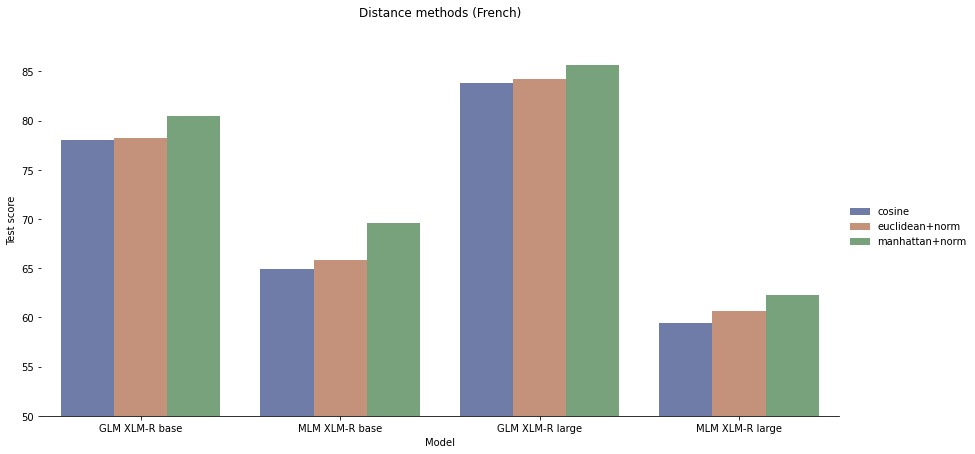

In [28]:
dist_fr_df = pd.DataFrame([
    ['cosine', 'GLM XLM-R base', 78],
    ['euclidean+norm', 'GLM XLM-R base', 78.2],
    ['manhattan+norm', 'GLM XLM-R base', 80.5],
    
    ['cosine', 'MLM XLM-R base', 64.9],
    ['euclidean+norm', 'MLM XLM-R base', 65.8],
    ['manhattan+norm', 'MLM XLM-R base', 69.6],
    
    ['cosine', 'GLM XLM-R large', 83.8],
    ['euclidean+norm', 'GLM XLM-R large', 84.2],
    ['manhattan+norm', 'GLM XLM-R large', 85.7],
    
    ['cosine', 'MLM XLM-R large', 59.4],
    ['euclidean+norm', 'MLM XLM-R large', 60.7],
    ['manhattan+norm', 'MLM XLM-R large', 62.3],
    
], columns=['method', 'model', 'score'])

draw_method_diff(dist_fr_df)
plt.title('Distance methods (French)');

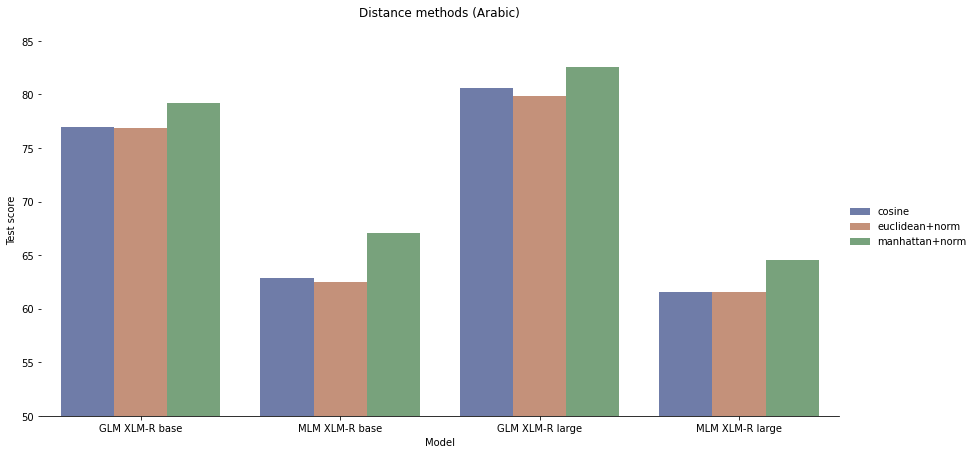

In [29]:
dist_ar_df = pd.DataFrame([
    ['cosine', 'GLM XLM-R base', 77],
    ['euclidean+norm', 'GLM XLM-R base', 76.9],
    ['manhattan+norm', 'GLM XLM-R base', 79.2],
    
    ['cosine', 'MLM XLM-R base', 62.9],
    ['euclidean+norm', 'MLM XLM-R base', 62.5],
    ['manhattan+norm', 'MLM XLM-R base', 67.1],
    
    ['cosine', 'GLM XLM-R large', 80.6],
    ['euclidean+norm', 'GLM XLM-R large', 79.9],
    ['manhattan+norm', 'GLM XLM-R large', 82.6],
    
    ['cosine', 'MLM XLM-R large', 61.6],
    ['euclidean+norm', 'MLM XLM-R large', 61.6],
    ['manhattan+norm', 'MLM XLM-R large', 64.5],
    
], columns=['method', 'model', 'score'])

draw_method_diff(dist_ar_df)
plt.title('Distance methods (Arabic)');

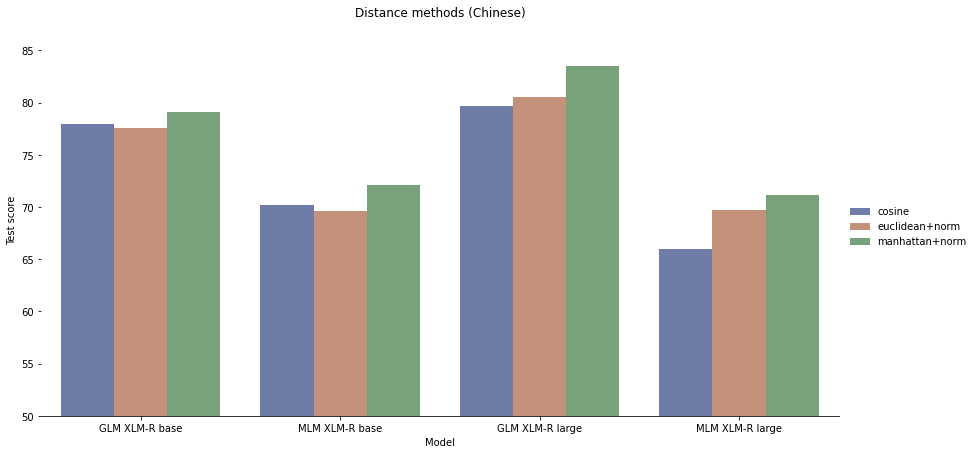

In [30]:
dist_zh_df = pd.DataFrame([
    ['cosine', 'GLM XLM-R base', 77.9],
    ['euclidean+norm', 'GLM XLM-R base', 77.6],
    ['manhattan+norm', 'GLM XLM-R base', 79.1],
    
    ['cosine', 'MLM XLM-R base', 70.2],
    ['euclidean+norm', 'MLM XLM-R base', 69.6],
    ['manhattan+norm', 'MLM XLM-R base', 72.1],
    
    ['cosine', 'GLM XLM-R large', 79.7],
    ['euclidean+norm', 'GLM XLM-R large', 80.5],
    ['manhattan+norm', 'GLM XLM-R large', 83.5],
    
    ['cosine', 'MLM XLM-R large', 66],
    ['euclidean+norm', 'MLM XLM-R large', 69.7],
    ['manhattan+norm', 'MLM XLM-R large', 71.1],
    
], columns=['method', 'model', 'score'])

draw_method_diff(dist_zh_df)
plt.title('Distance methods (Chinese)');

In [220]:
def draw_method_diff_langs(dist_df):
    sns.set_context("paper", rc={
        "font.size": 15,"axes.titlesize": 15,"axes.labelsize": 17, "legend.fontsize": 17,
        "xtick.labelsize": 14, "ytick.labelsize": 14
    })
    
    g = sns.catplot(
            data=dist_df, kind="bar",
            x="model", y="score", hue="method", col="lang",
            ci="sd", palette="dark", alpha=.6, height=6,
            aspect=5/6, 
        )
    
    g.set(ylim=(50, None))
    g.despine(left=True)
    g.set_axis_labels("Model", "Test score")
    g.legend.set_title("")
    g.set_xticklabels(rotation=30)

    #plt.setp(g.legend.get_texts(), fontsize='15')

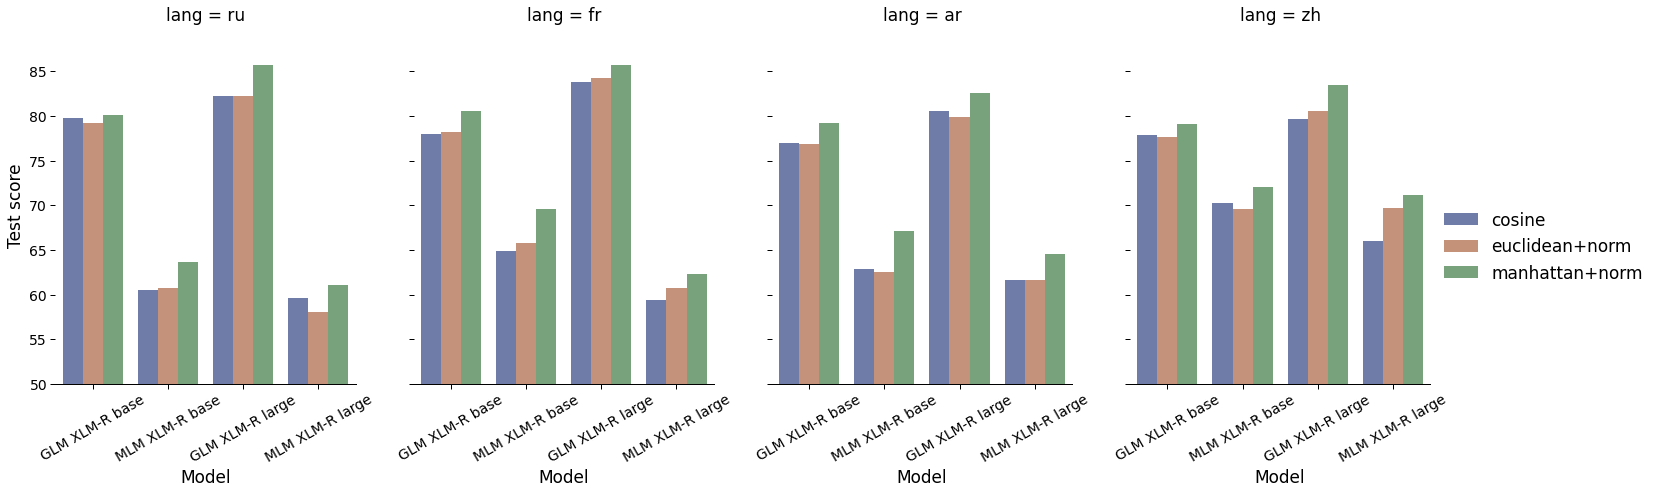

In [221]:
dist_ru_df['lang'] = 'ru'
dist_fr_df['lang'] = 'fr'
dist_ar_df['lang'] = 'ar'
dist_zh_df['lang'] = 'zh'

dist_df = pd.concat([dist_ru_df, dist_fr_df, dist_ar_df, dist_zh_df])
draw_method_diff_langs(dist_df)

# SemEval07 F1 and WiC precision

In [232]:
en_wic_acc = [72.1, 88.5, 88.7, 89.9, 89, 89.5, 90.1, 87.7, 88.9, 88.3, 88.7]
ru_wic_acc = [61.1, 84, 84.8, 85.7, 85.5, 85.7, 84.5, 84.3, 84.6, 84.6, 84.5]
fr_wic_acc = [62.3, 84.1, 87.8, 87.3, 86.4, 85.7, 86.8, 86.4, 85.7, 85.2, 85.3]
ar_wic_acc = [64.5, 78.9, 81.3, 81.1, 80.3, 82.6, 82.8, 82.4, 82.6, 81.7, 82]
zh_wic_acc = [71.1, 81.3, 83.6, 83.3, 84.7, 83.5, 84, 82.9, 80.8, 83.8, 83.9]

dev_f1 = [68.4, 74.7, 73, 74.5, 75.4, 73.4, 72.5, 73.2, 72.1, 73.4]

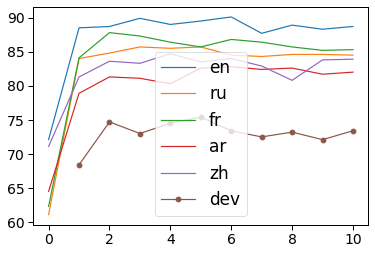

In [235]:
epochs = range(0, len(en_wic_acc))
dev_epochs = range(1, len(en_wic_acc))

plt.plot(epochs, en_wic_acc)
plt.plot(epochs, ru_wic_acc)
plt.plot(epochs, fr_wic_acc)
plt.plot(epochs, ar_wic_acc)
plt.plot(epochs, zh_wic_acc)
plt.plot(dev_epochs, dev_f1, marker='o')

plt.legend(['en', 'ru', 'fr', 'ar', 'zh', 'dev'])

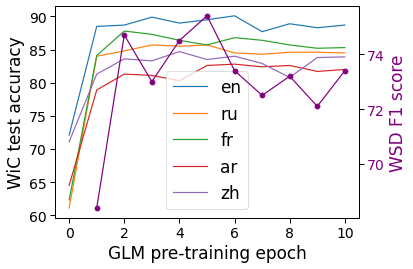

In [253]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('GLM pre-training epoch')
ax1.set_ylabel('WiC test accuracy')
plt.plot(epochs, en_wic_acc)
plt.plot(epochs, ru_wic_acc)
plt.plot(epochs, fr_wic_acc)
plt.plot(epochs, ar_wic_acc)
plt.plot(epochs, zh_wic_acc)
ax1.tick_params(axis='y')

plt.legend(['en', 'ru', 'fr', 'ar', 'zh'])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'purple'
ax2.set_ylabel('WSD F1 score', color=color)  # we already handled the x-label with ax1
plt.plot(dev_epochs, dev_f1, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()